In [1]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(dplyr))
suppressMessages(library(viridis))

In [2]:
out_dir <- "../../results/07_marchphages/04_cell_state_score"

if(!dir.exists(out_dir)){
    dir.create(out_dir, recursive = TRUE)
}

In [3]:
sample_list <- c('HC01', 'HC02', 'HC03', 'HC05',
                 'SSc4994', 
                 'SSc5380', 
               'SSc-HL01', 'SSc-HL05', 'SSc-HL06', 'SSc-HL11',
               'SSc-HL13', 'SSc-HL25', 'SSc-HL33', 'SSc-HL35')

In [4]:
for(sample in sample_list){
    obj <- readRDS(glue::glue("../../results/04_spatial/01_read_data/{sample}.rds"))
    df <- read.csv(glue::glue('../../results/04_spatial/09_run_cell2location/{sample}.csv'), row.names = 1)
    obj <- AddMetaData(obj, metadata = df) 

    df_markers <- read.csv("../../results/07_marchphages/02_annotate/marker_genes.csv")

    # only keep genes that are found in spatial dta
    gene.use <- intersect(rownames(obj), df_markers$gene)
    
    df_markers <- df_markers %>%
        subset(gene %in%gene.use) %>%
        dplyr::group_by(cluster) %>%
        top_n(n = 100, wt = log.fold.change) %>%
        subset(select = c("gene", "cluster"))
    
    # convert dataframe to list for module score calculation
    all.markers <- split(df_markers, df_markers$cluster)

    for(cl in names(all.markers)){
        all.markers[[cl]] <- all.markers[[cl]]$gene 
    }
    
    # compute module score
    obj <- AddModuleScore(obj, features = all.markers)
    
    df_module_score <- as.data.frame(obj@meta.data)%>%
        select(., contains("Cluster"))

    colnames(df_module_score) <- names(all.markers)
    celltypes <- names(all.markers)
    
    write.csv(df_module_score, glue::glue("../../results/07_marchphages/04_cell_state_score/{sample}_score.csv"))
    
    obj <- AddMetaData(obj, metadata = df_module_score)
    
    saveRDS(obj, glue::glue("../../results/07_marchphages/04_cell_state_score/{sample}.rds"))

}

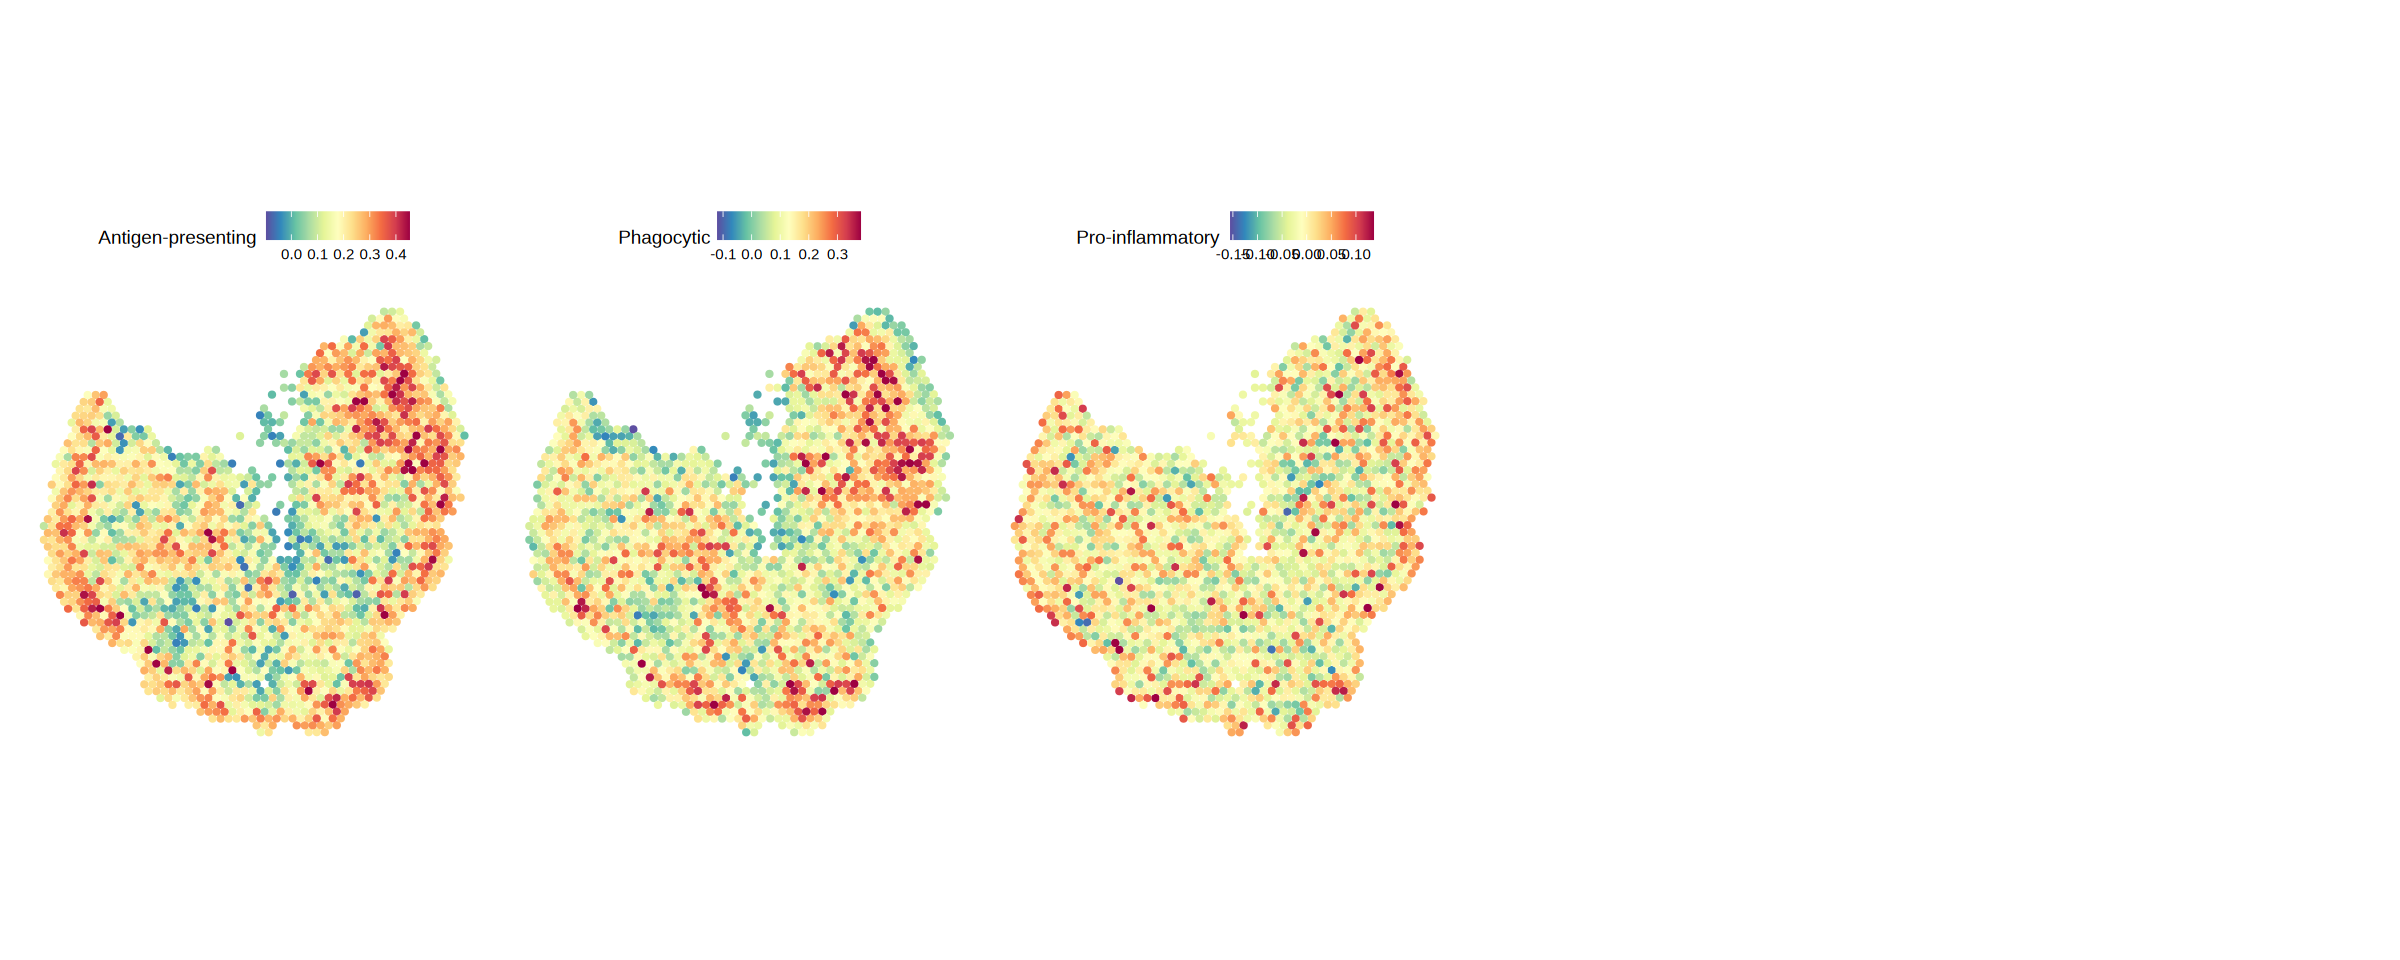

In [5]:
options(repr.plot.height = 8, repr.plot.width = 20)

obj <- readRDS(glue::glue("{out_dir}/HC01.rds"))

SpatialFeaturePlot(obj, features = celltypes, combine = TRUE, 
                   ncol = 5, image.alpha = 0,
                   max.cutoff = "q99", pt.size.factor = 1.8)

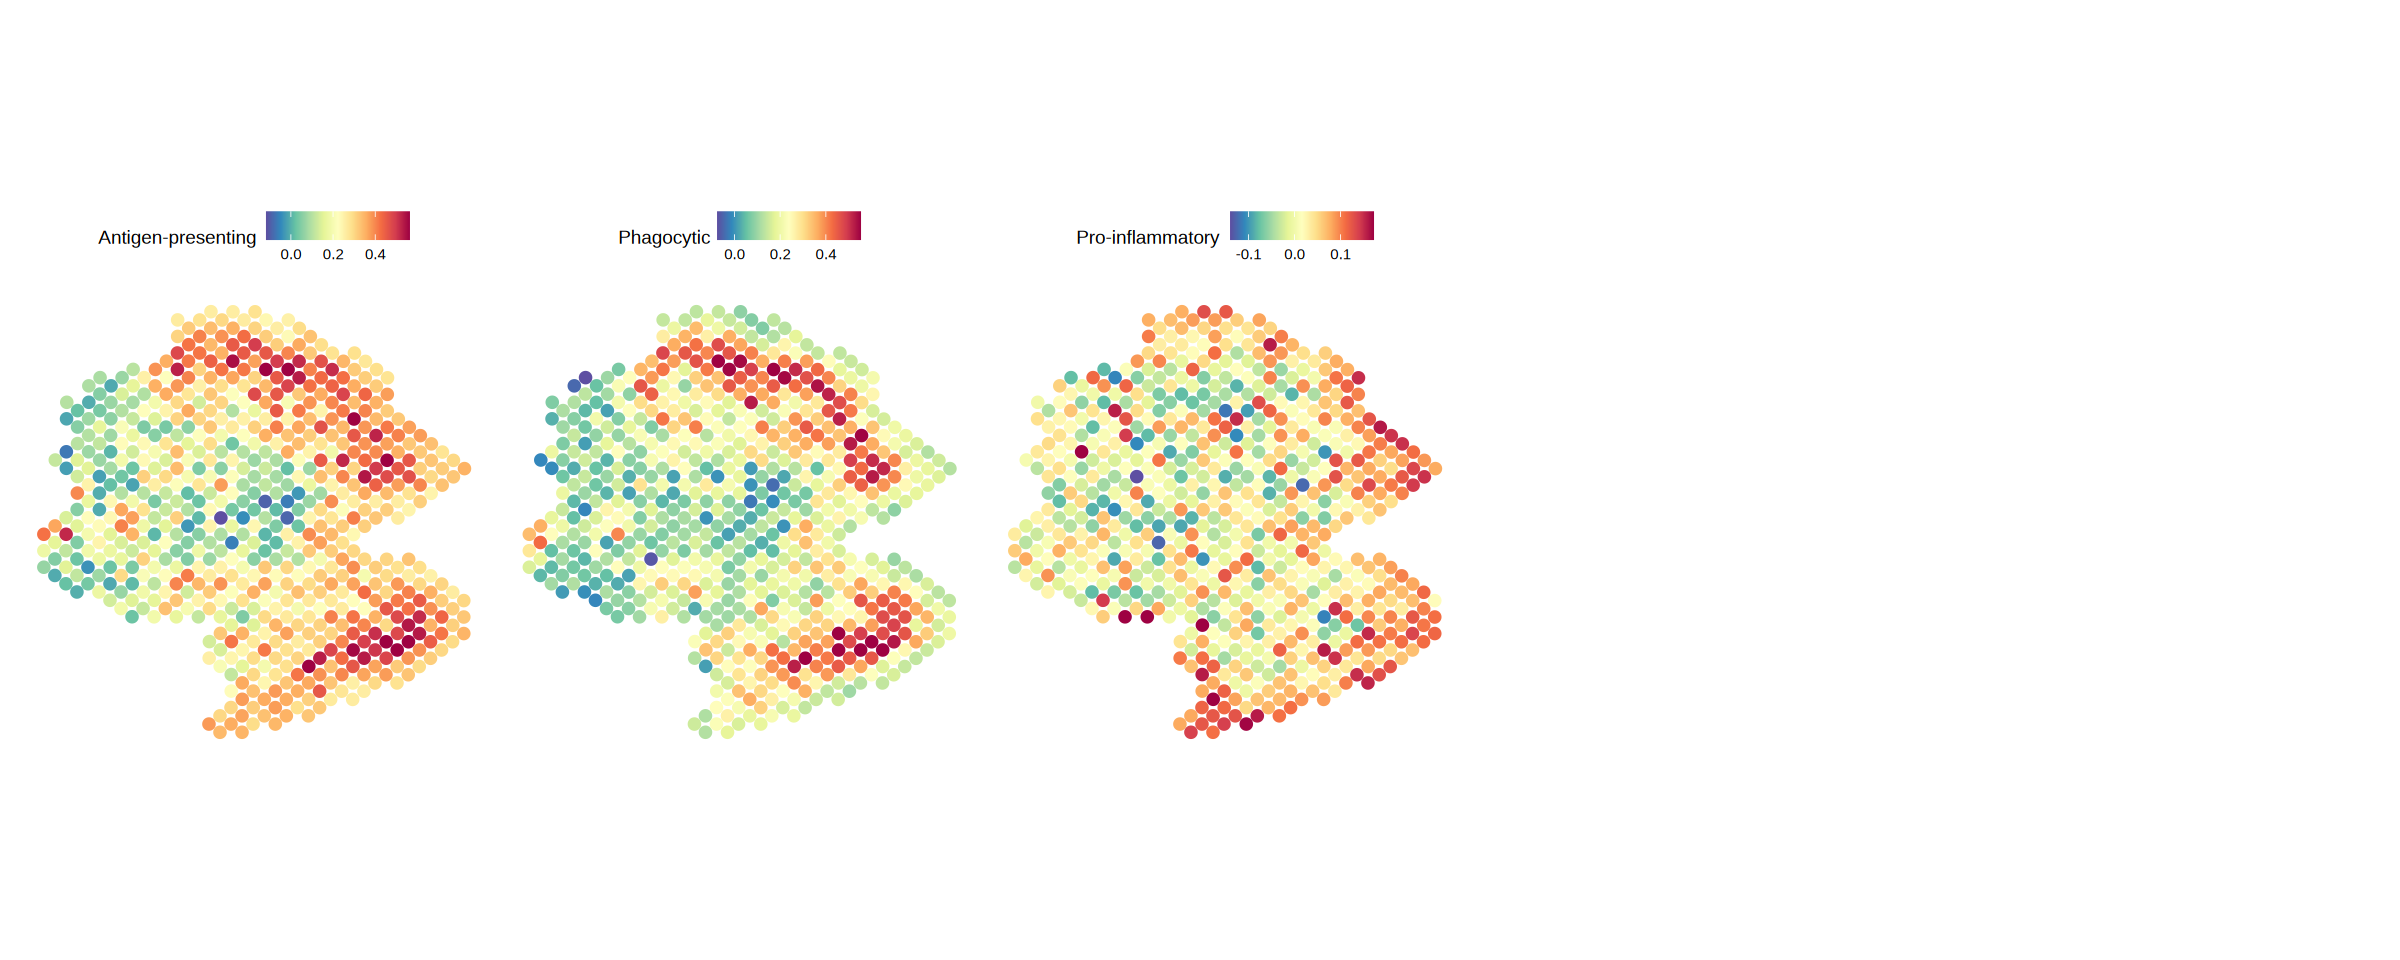

In [6]:
options(repr.plot.height = 8, repr.plot.width = 20)

obj <- readRDS(glue::glue("{out_dir}/HC02.rds"))

SpatialFeaturePlot(obj, features = celltypes, combine = TRUE, 
                   ncol = 5, image.alpha = 0,
                   max.cutoff = "q99", pt.size.factor = 9)

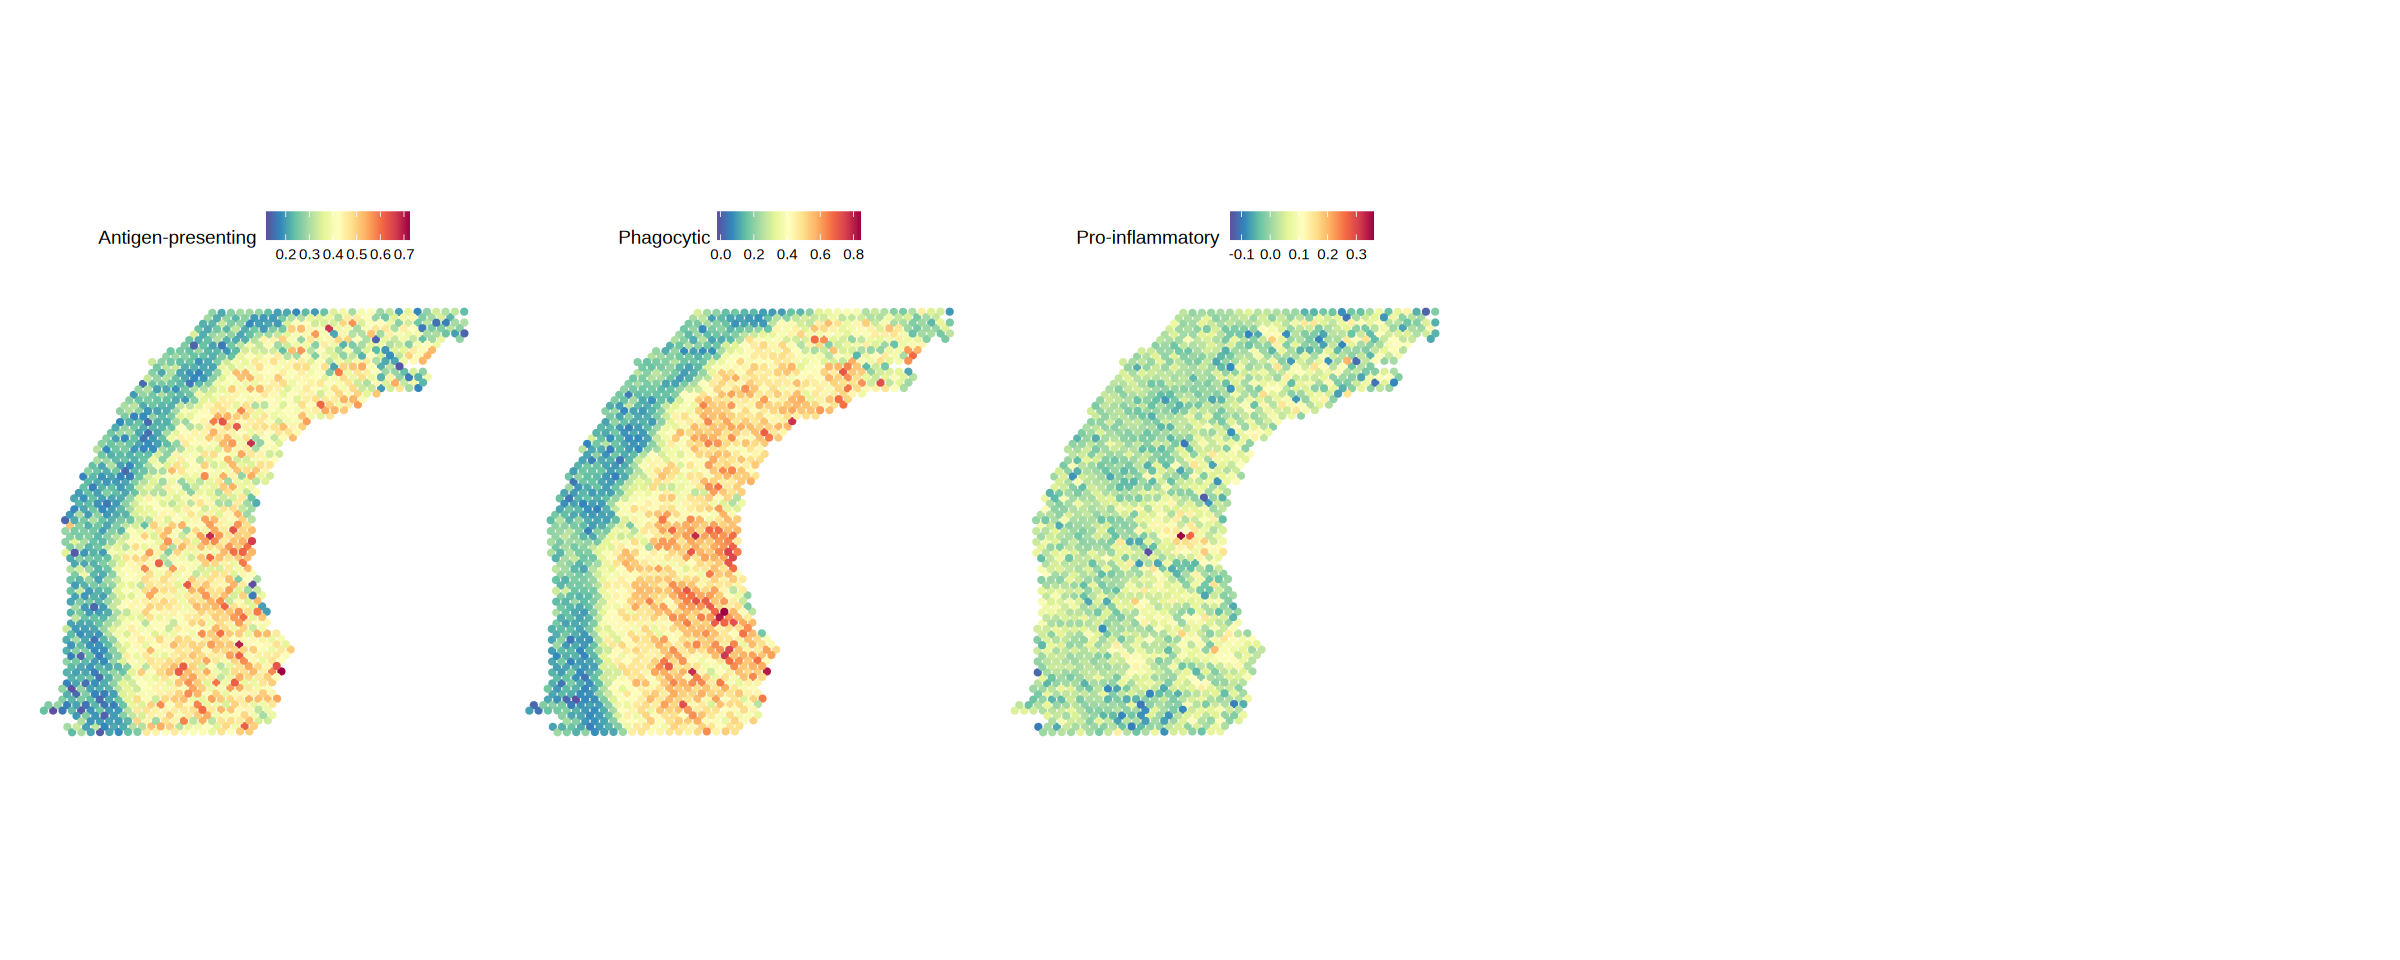

In [7]:
options(repr.plot.height = 8, repr.plot.width = 20)

obj <- readRDS(glue::glue("{out_dir}/HC03.rds"))

SpatialFeaturePlot(obj, features = celltypes, combine = TRUE, 
                   ncol = 5, image.alpha = 0,
                   pt.size.factor = 12.5)

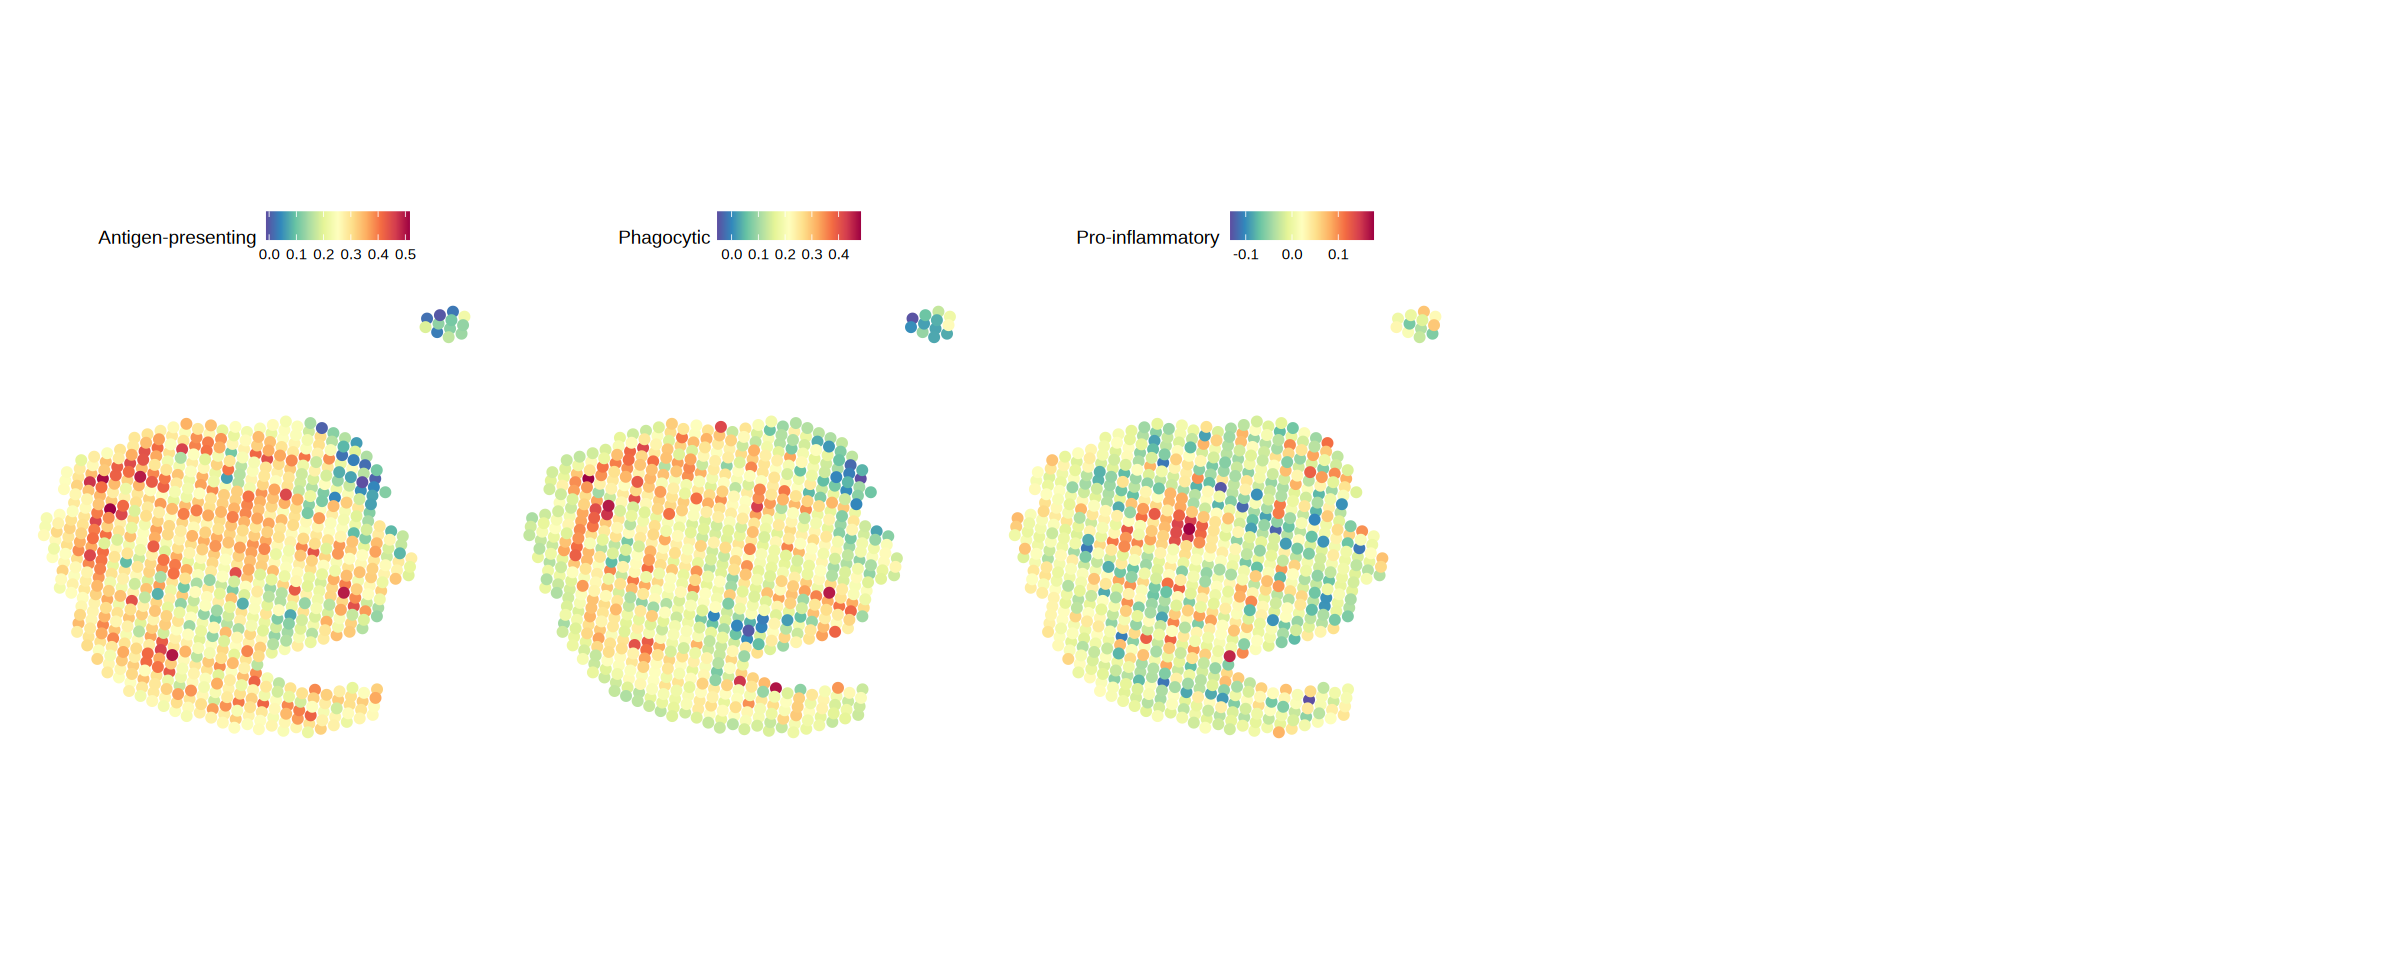

In [8]:
options(repr.plot.height = 8, repr.plot.width = 20)

obj <- readRDS(glue::glue("{out_dir}/HC05.rds"))

SpatialFeaturePlot(obj, features = celltypes, combine = TRUE, 
                   ncol = 5, image.alpha = 0, pt.size.factor = 18)

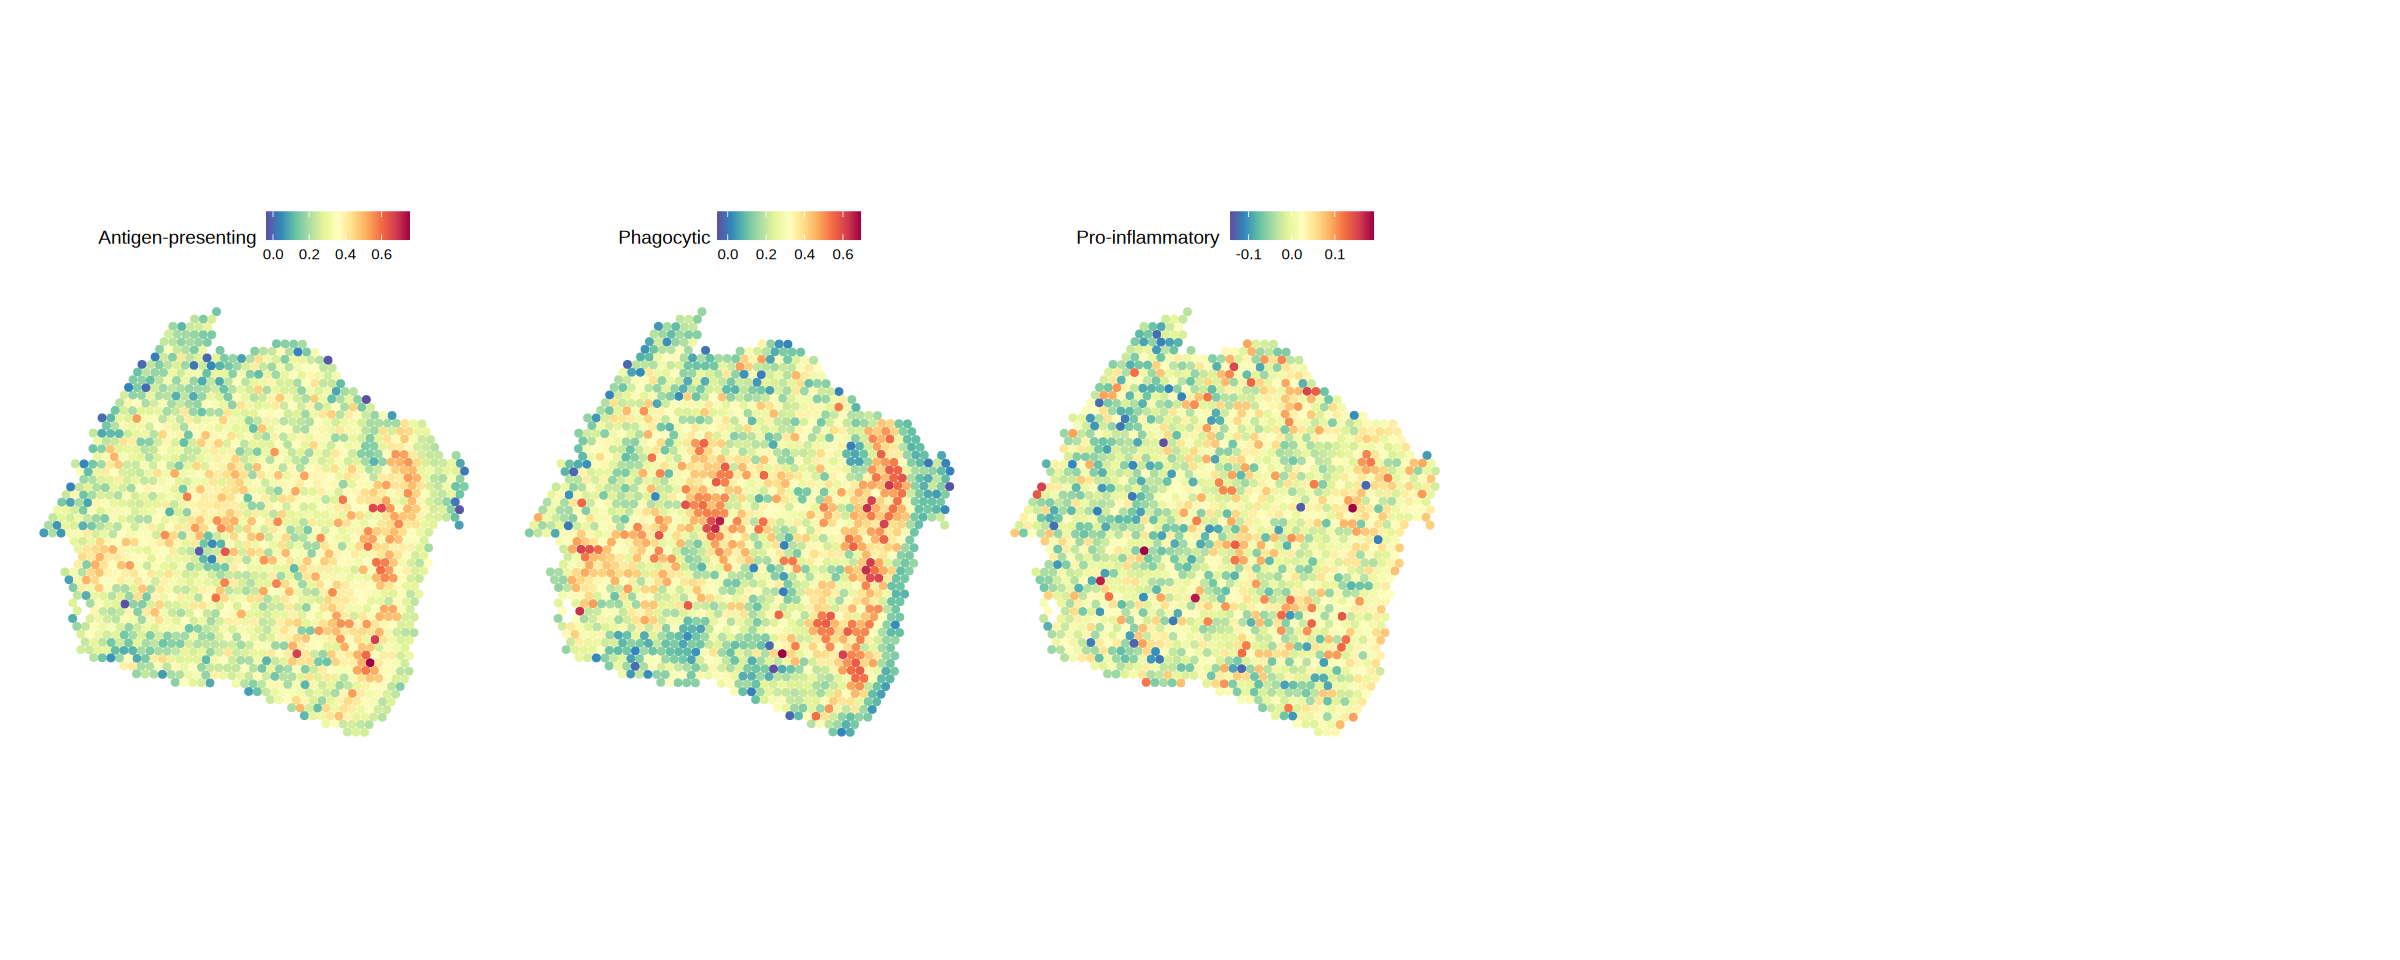

In [9]:
options(repr.plot.height = 8, repr.plot.width = 20)

obj <- readRDS(glue::glue("{out_dir}/SSc4994.rds"))

SpatialFeaturePlot(obj, features = celltypes, combine = TRUE, 
                   ncol = 5, image.alpha = 0, pt.size.factor = 5)

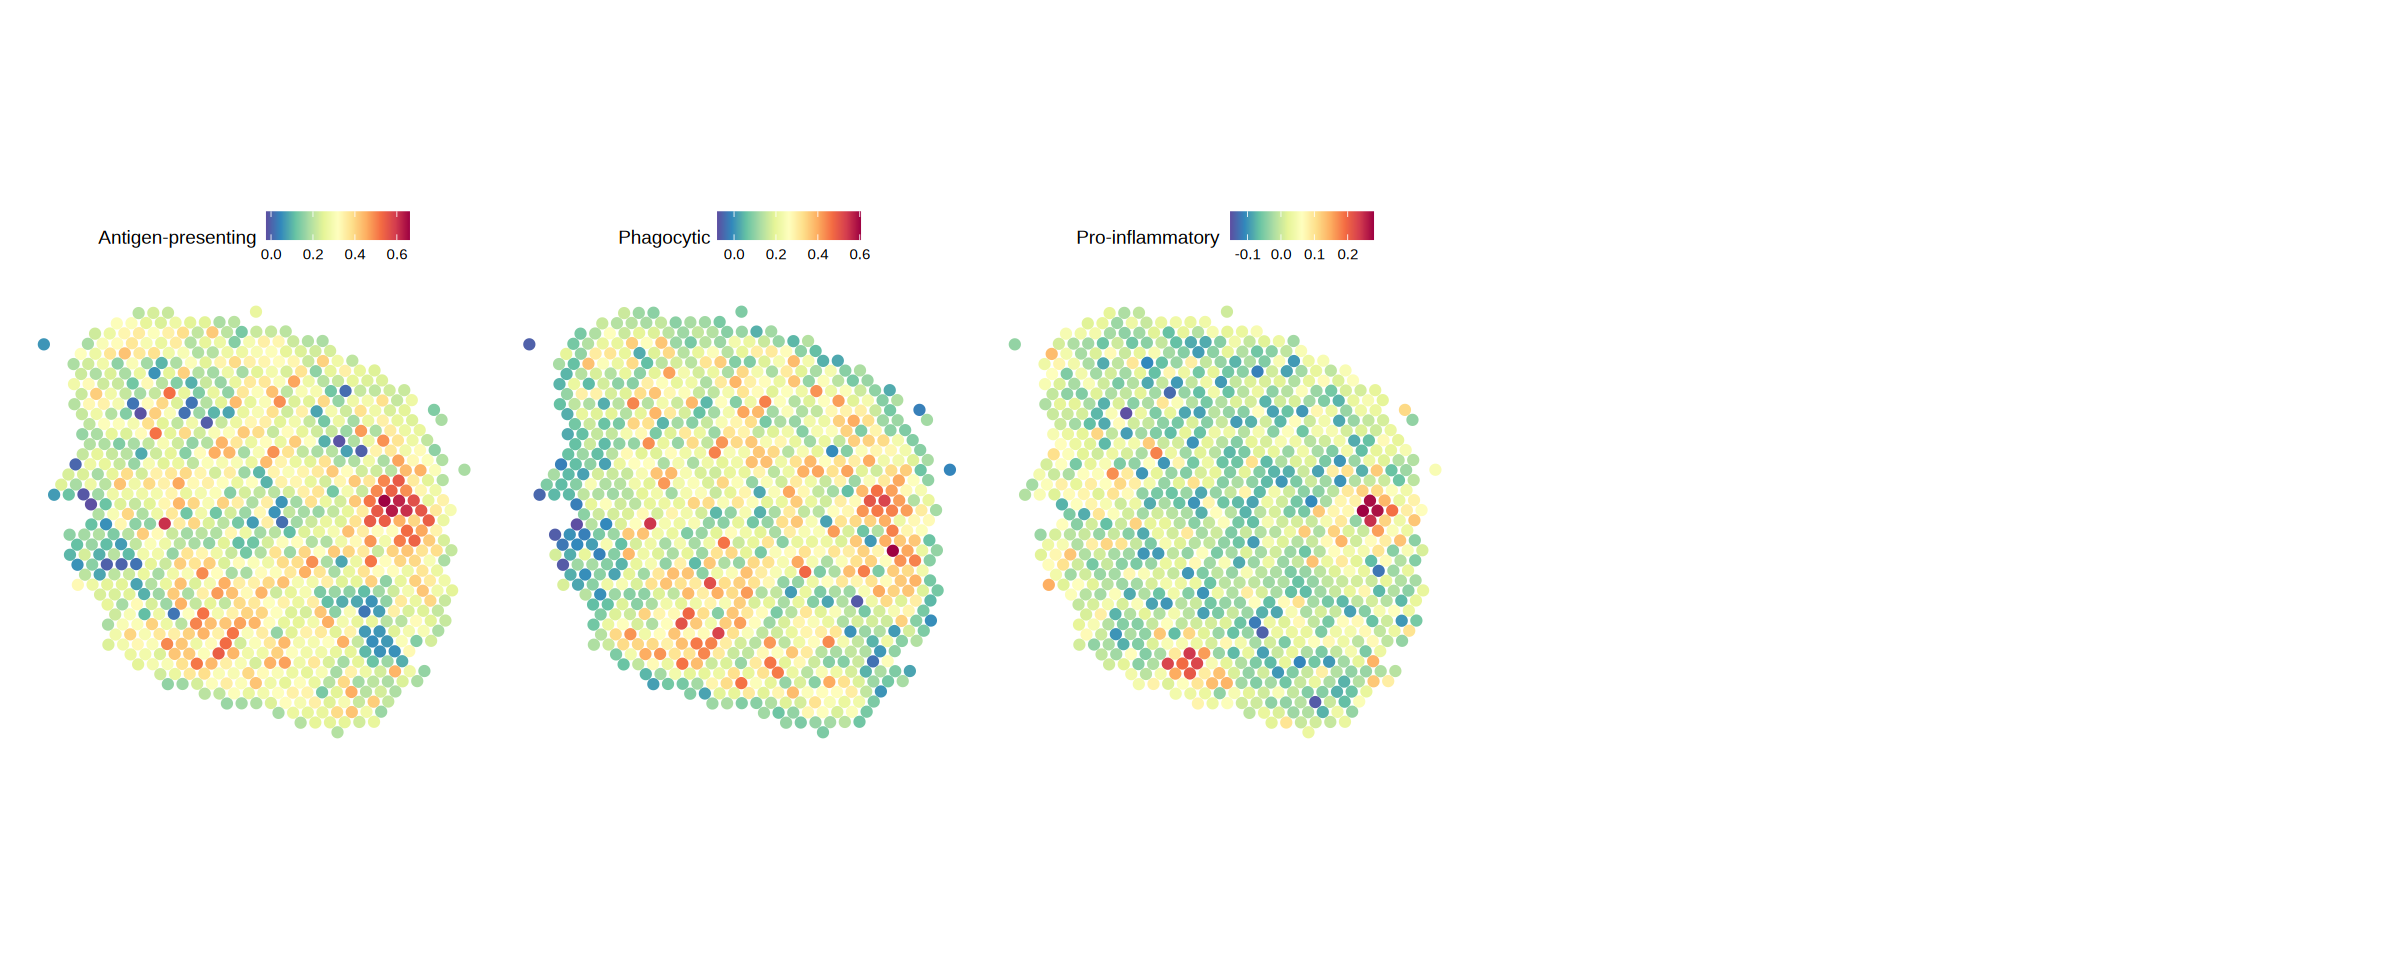

In [10]:
options(repr.plot.height = 8, repr.plot.width = 20)

obj <- readRDS(glue::glue("{out_dir}/SSc5380.rds"))

SpatialFeaturePlot(obj, features = celltypes, combine = TRUE, 
                   ncol = 5, image.alpha = 0, pt.size.factor = 2)

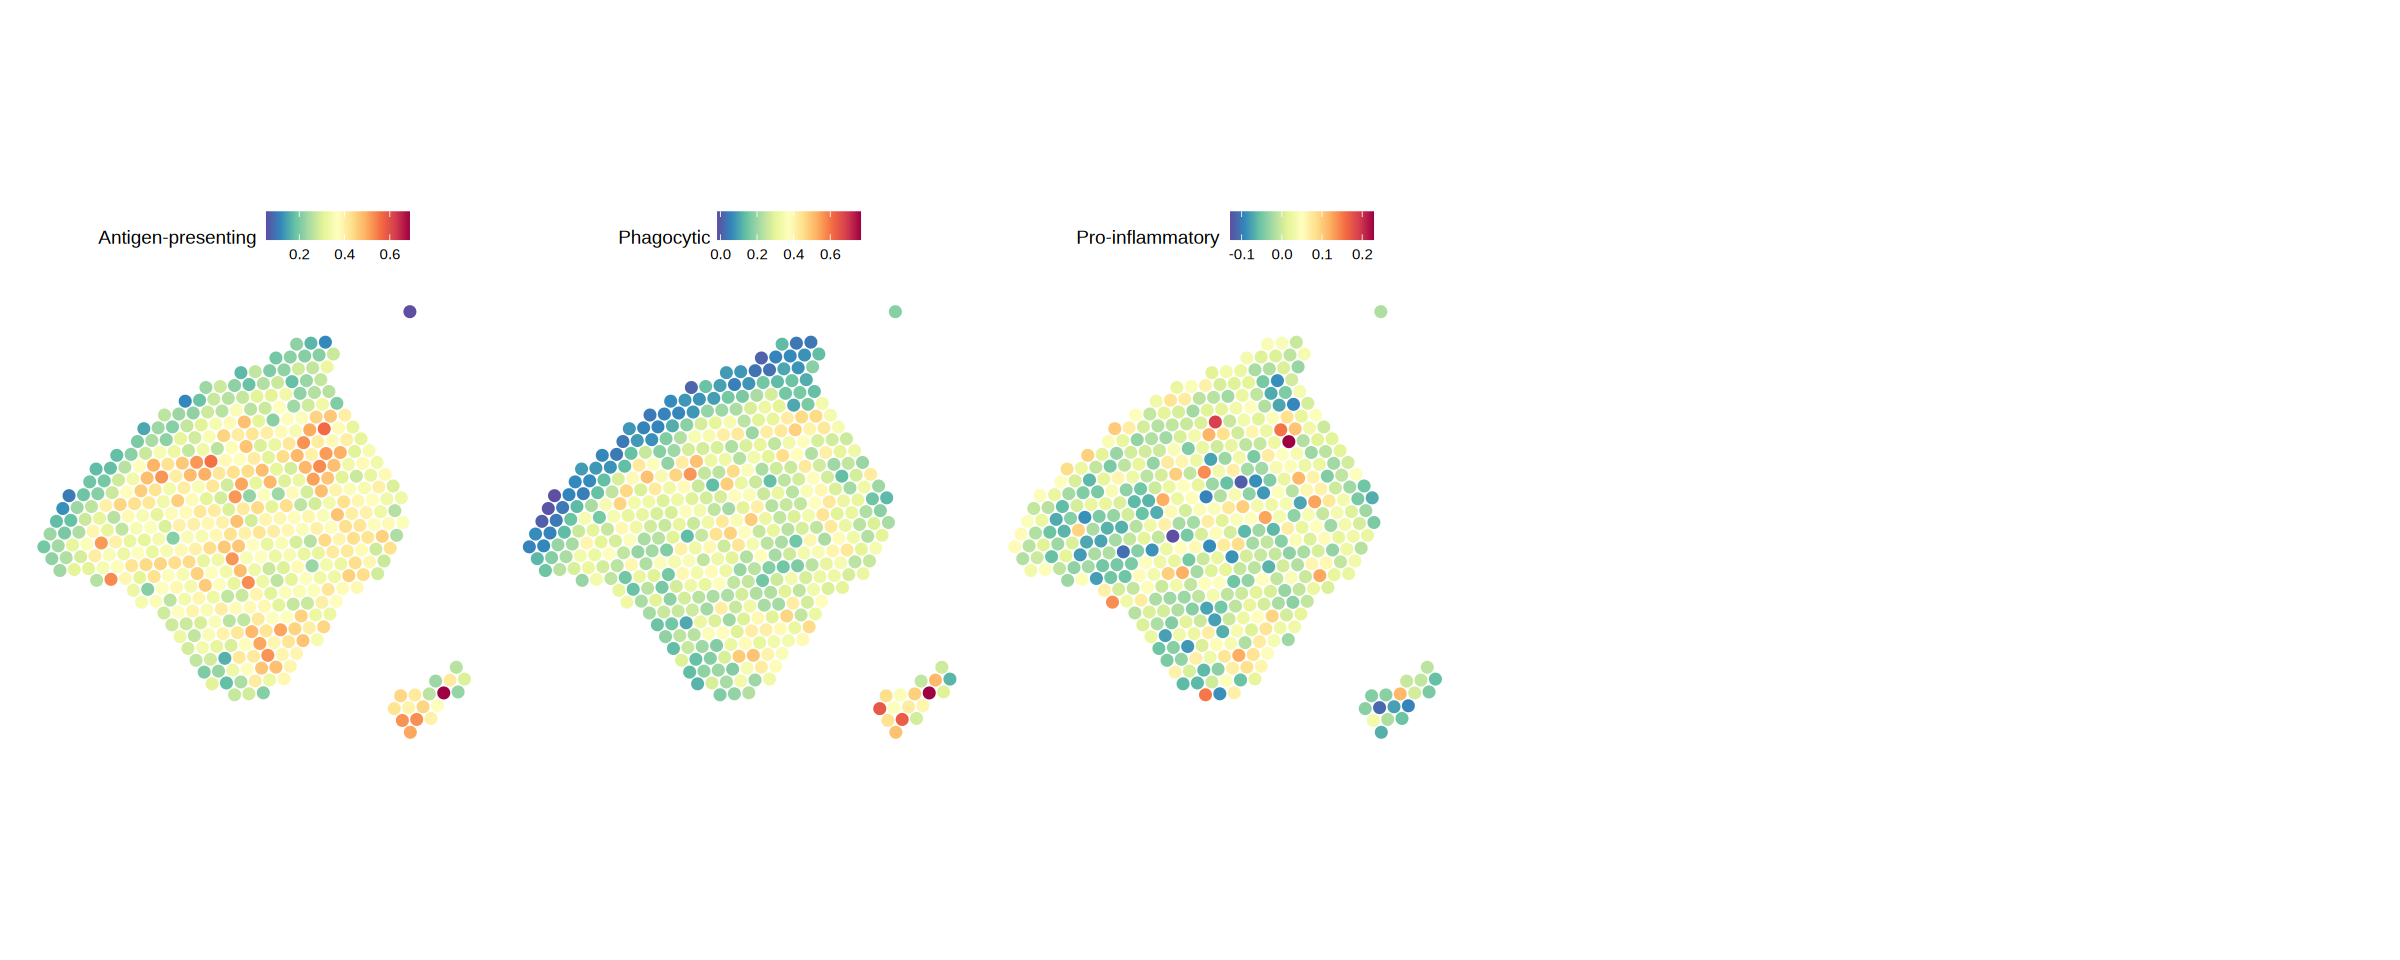

In [11]:
options(repr.plot.height = 8, repr.plot.width = 20)

obj <- readRDS(glue::glue("{out_dir}/SSc-HL01.rds"))

SpatialFeaturePlot(obj, features = celltypes, combine = TRUE, 
                   ncol = 5, image.alpha = 0, pt.size.factor = 18)

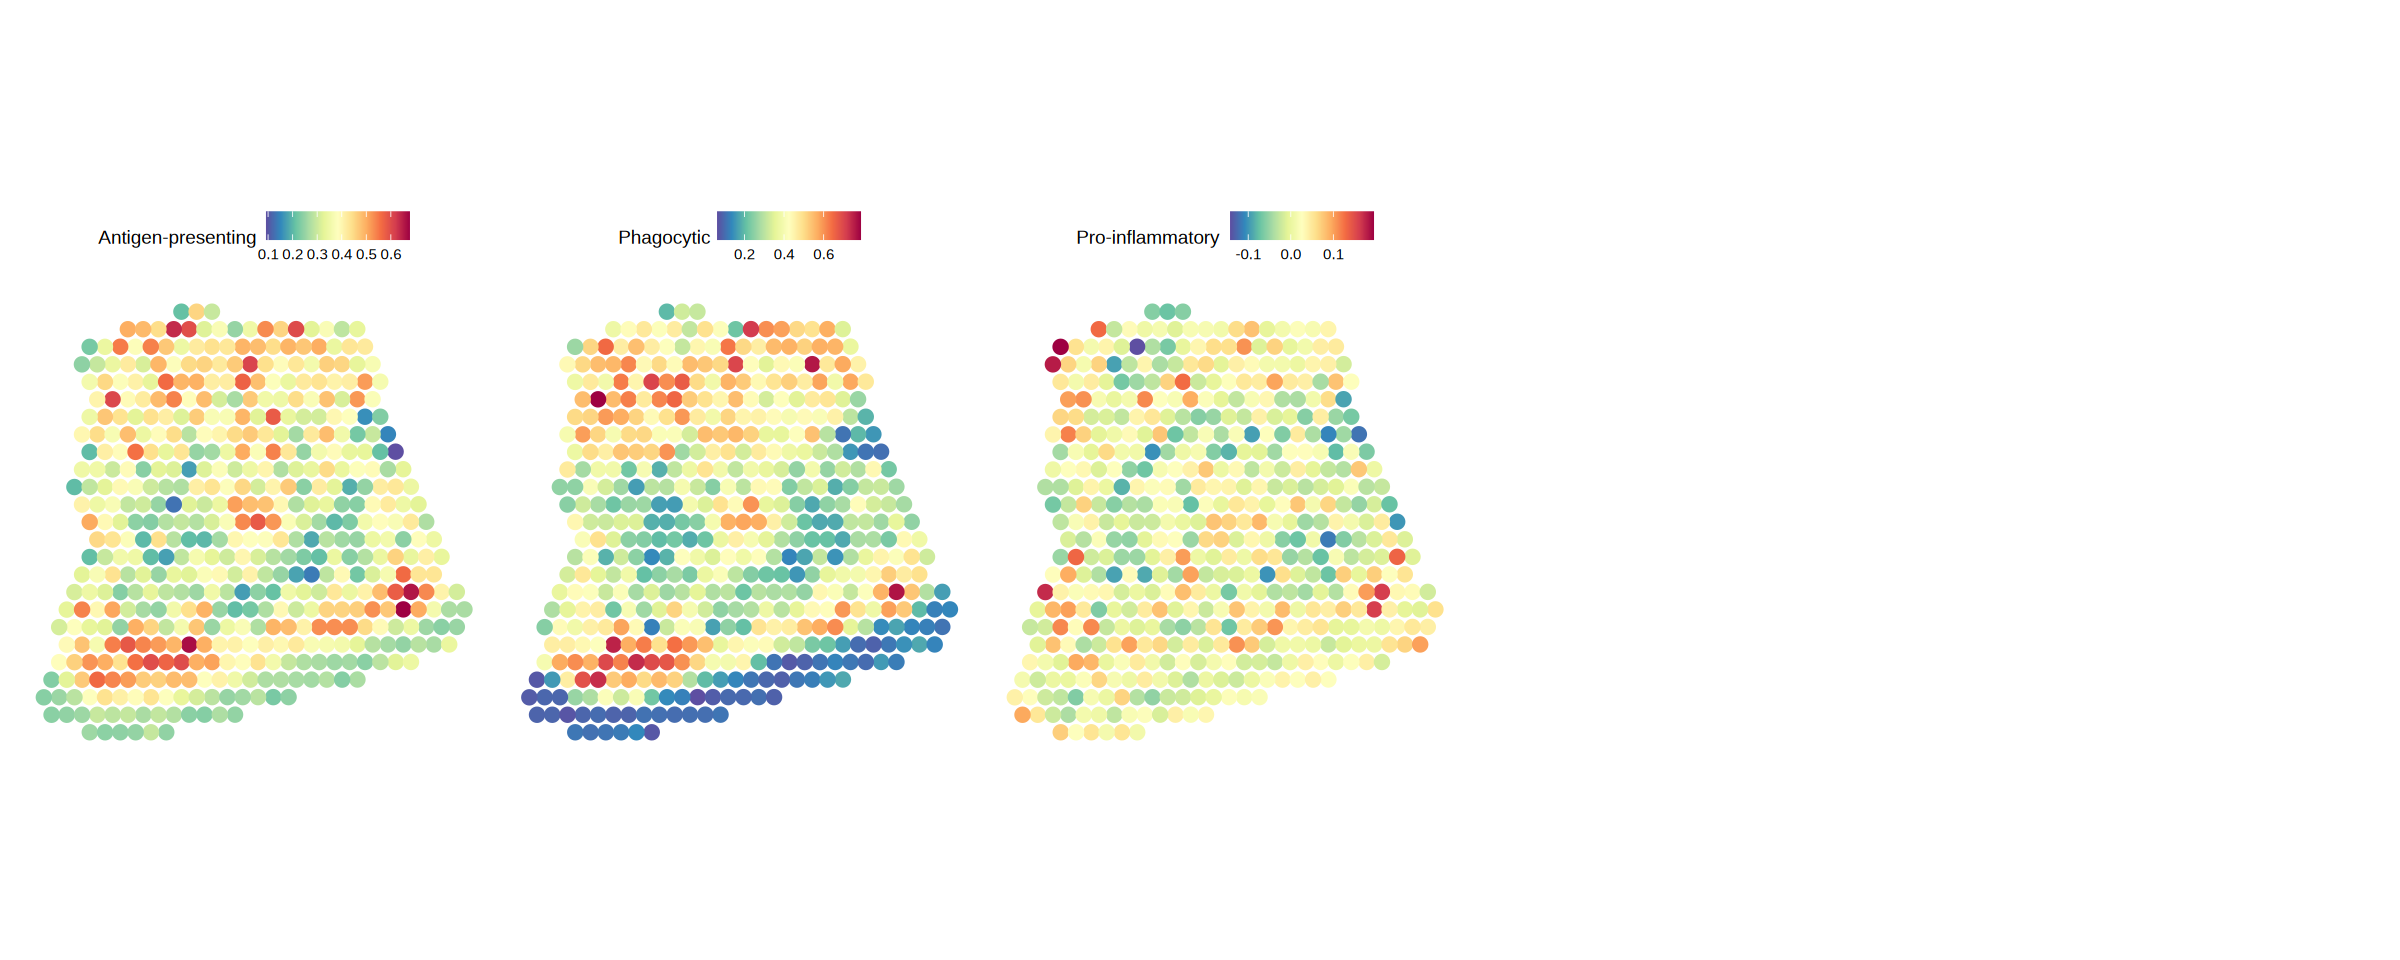

In [12]:
options(repr.plot.height = 8, repr.plot.width = 20)

obj <- readRDS(glue::glue("{out_dir}/SSc-HL05.rds"))

SpatialFeaturePlot(obj, features = celltypes, combine = TRUE, 
                   ncol = 5, image.alpha = 0, pt.size.factor = 5)

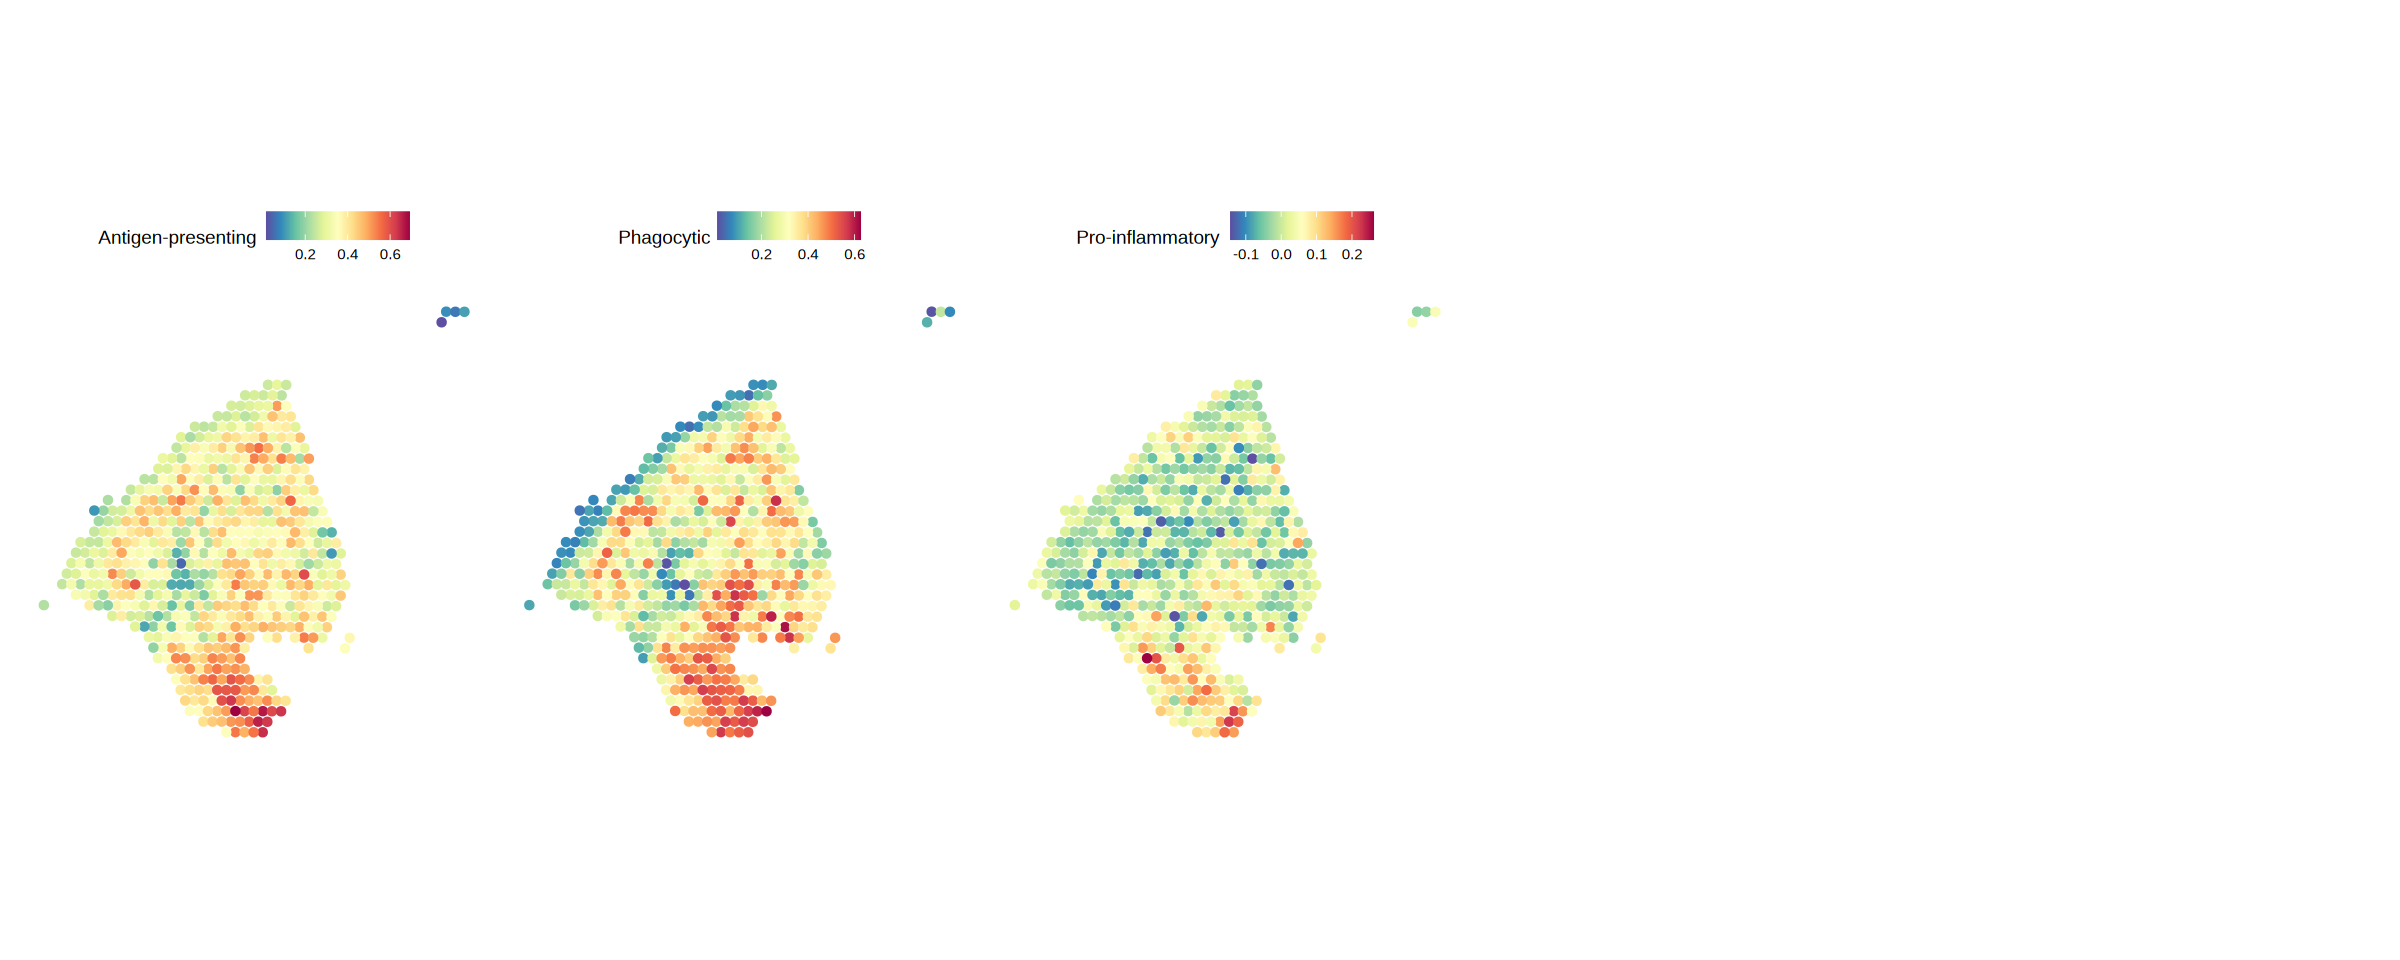

In [13]:
options(repr.plot.height = 8, repr.plot.width = 20)

obj <- readRDS(glue::glue("{out_dir}/SSc-HL06.rds"))

SpatialFeaturePlot(obj, features = celltypes, combine = TRUE, 
                   ncol = 5, image.alpha = 0, pt.size.factor = 13)

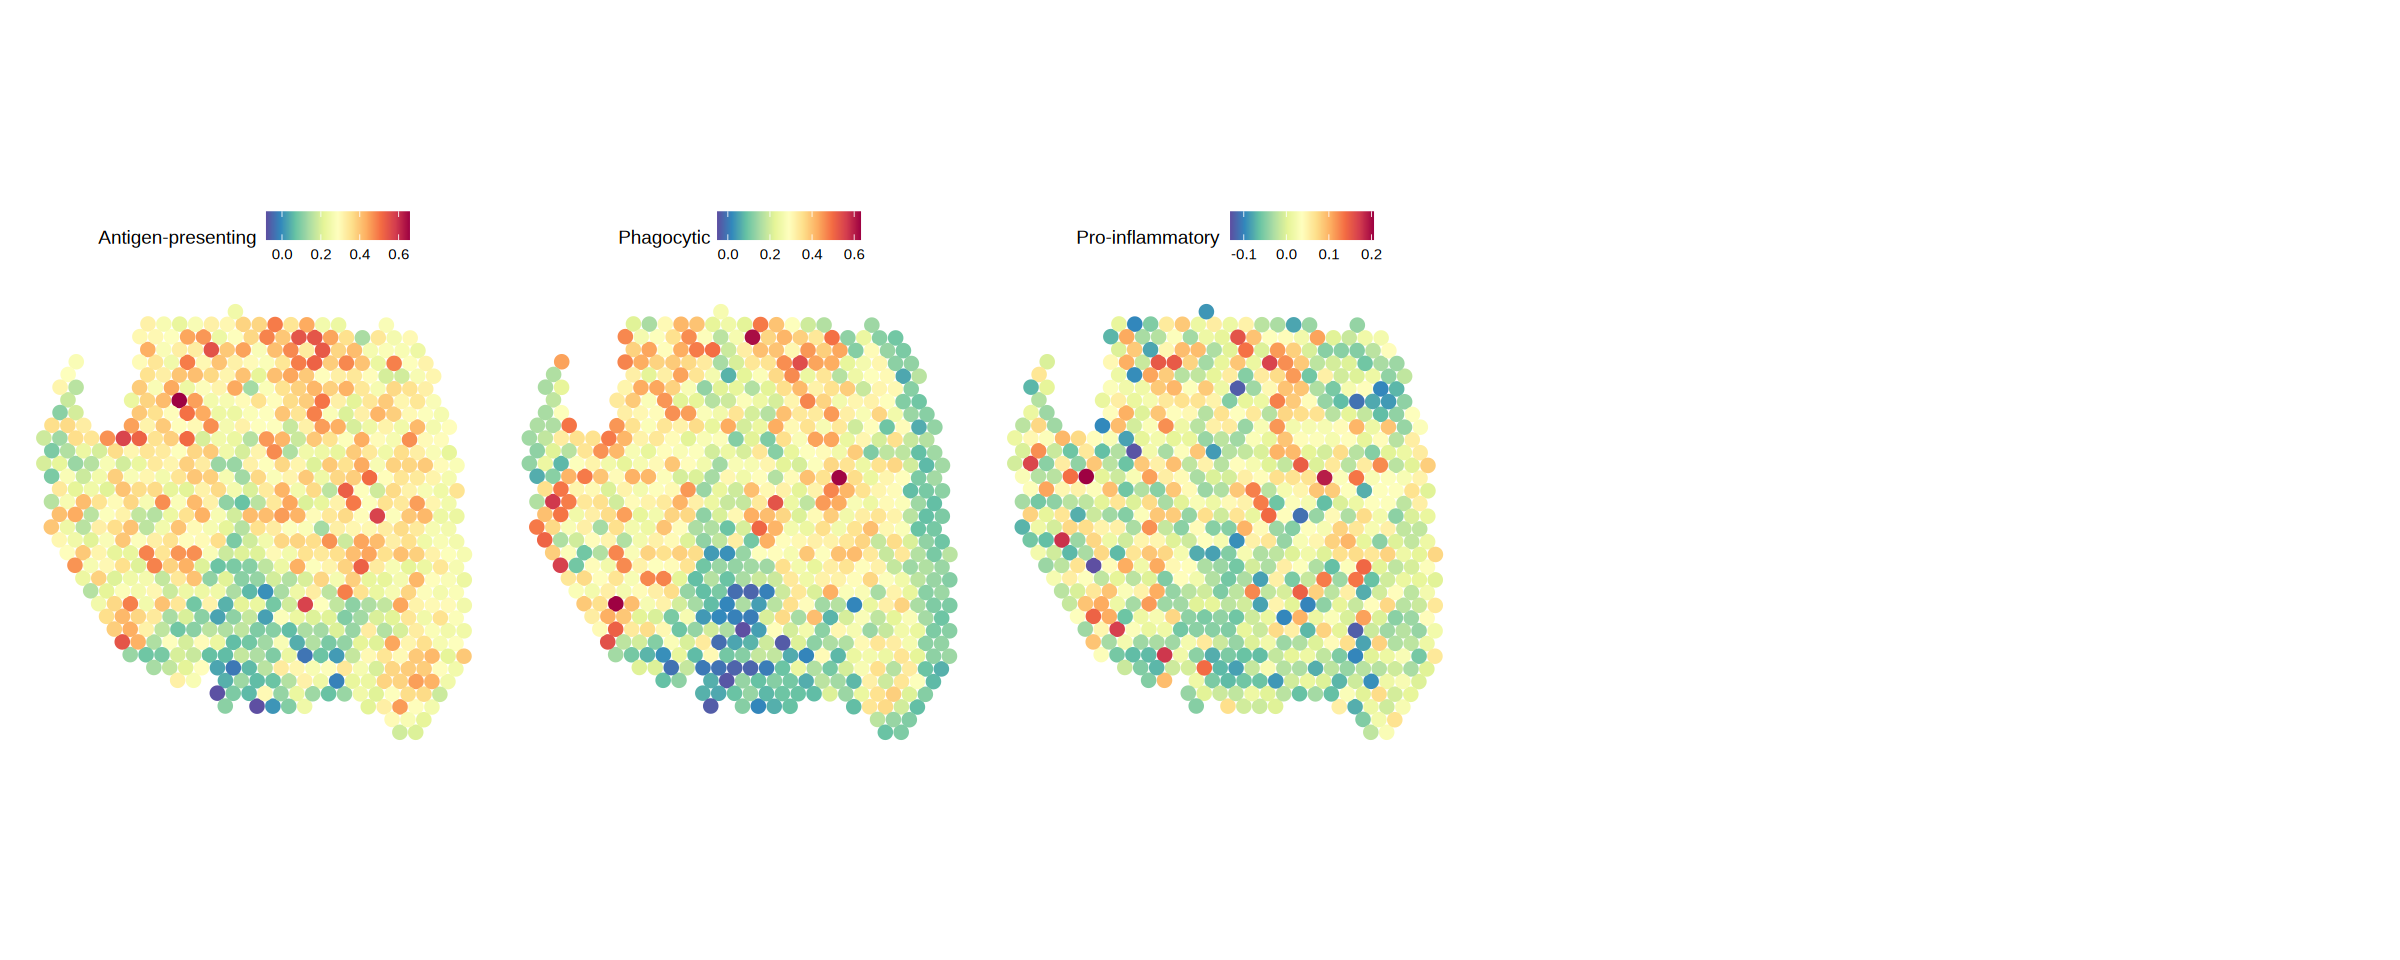

In [14]:
options(repr.plot.height = 8, repr.plot.width = 20)

obj <- readRDS(glue::glue("{out_dir}/SSc-HL11.rds"))

SpatialFeaturePlot(obj, features = celltypes, combine = TRUE, 
                   ncol = 5, image.alpha = 0, pt.size.factor = 10.5)

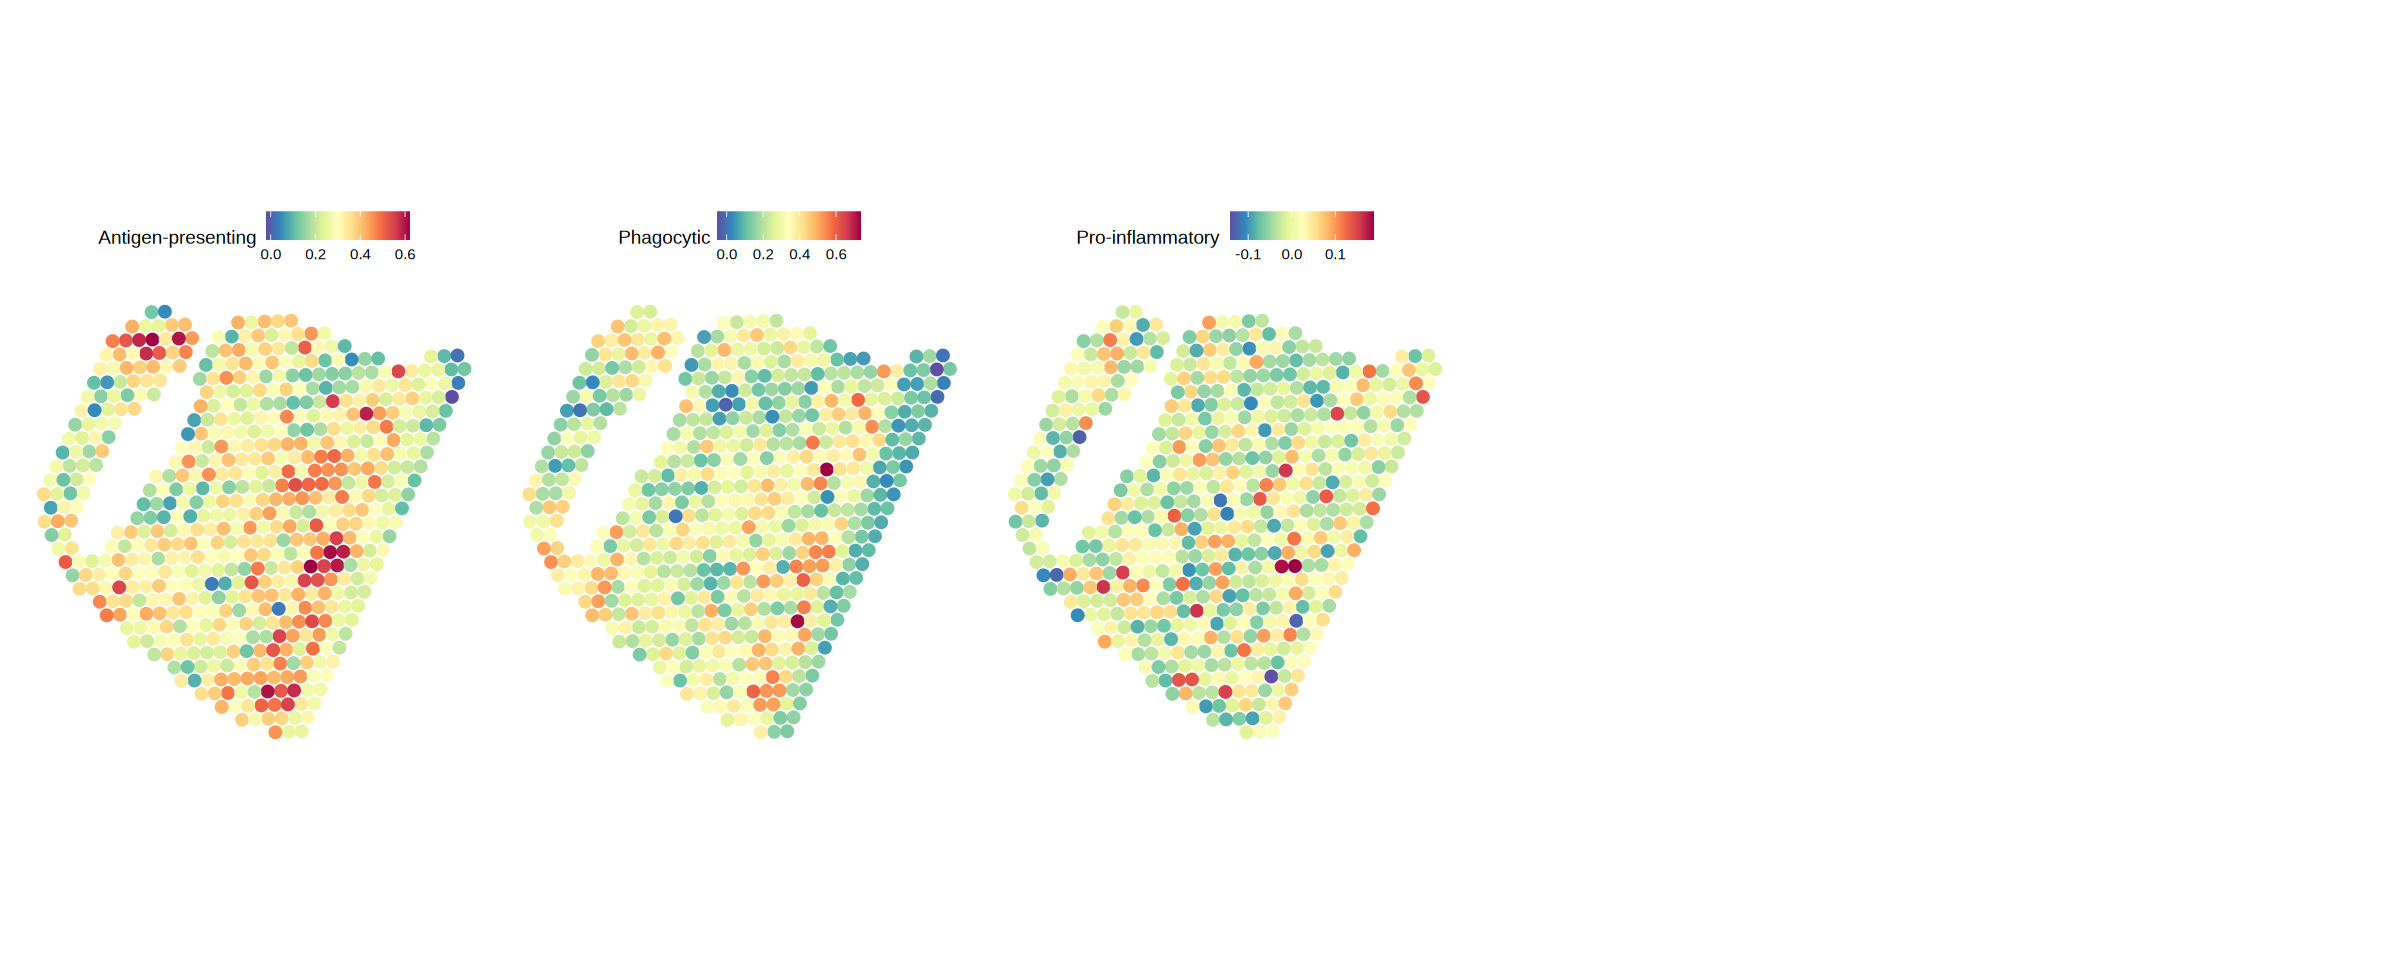

In [15]:
options(repr.plot.height = 8, repr.plot.width = 20)

obj <- readRDS(glue::glue("{out_dir}/SSc-HL13.rds"))

SpatialFeaturePlot(obj, features = celltypes, combine = TRUE, 
                   ncol = 5, image.alpha = 0, pt.size.factor = 20)

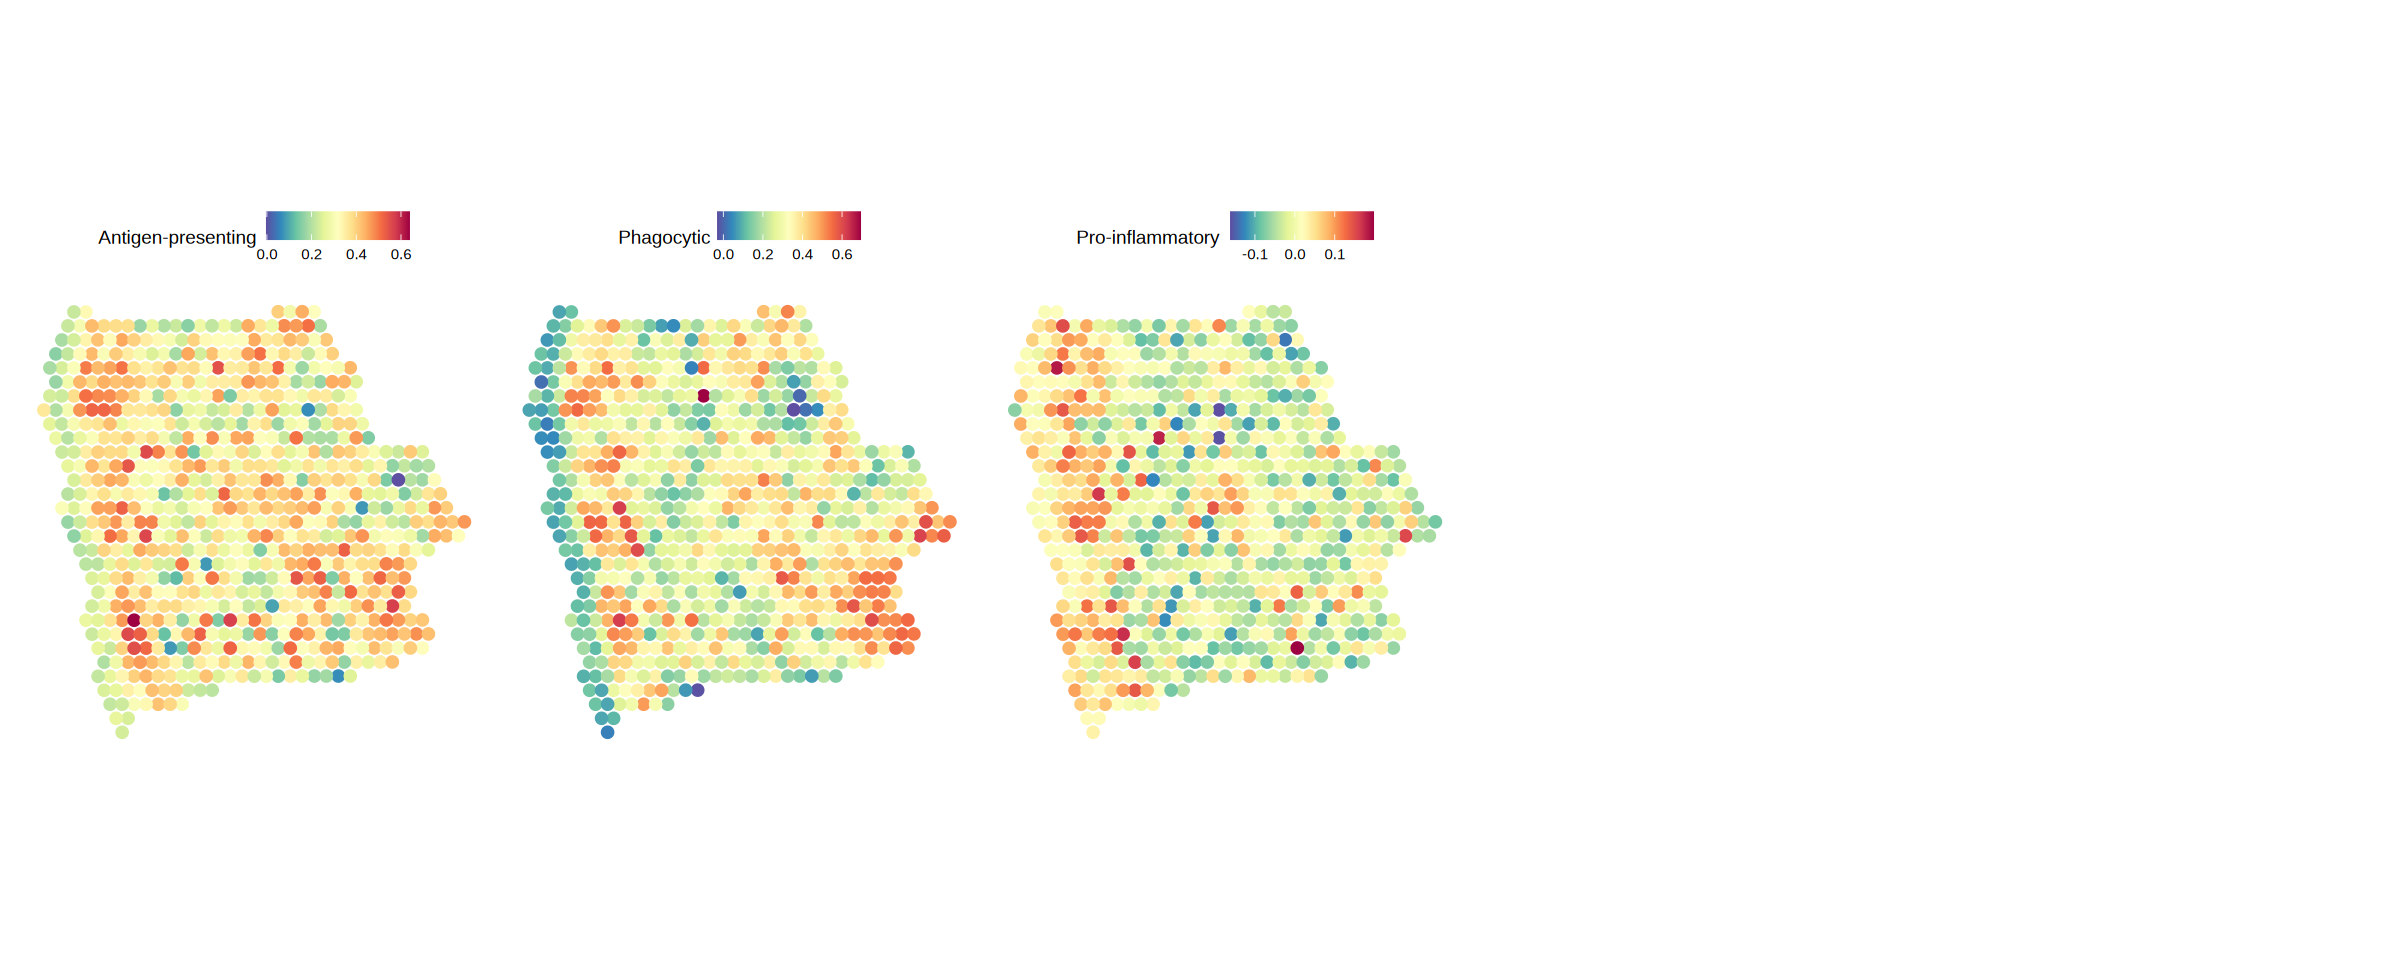

In [16]:
options(repr.plot.height = 8, repr.plot.width = 20)

obj <- readRDS(glue::glue("{out_dir}/SSc-HL25.rds"))

SpatialFeaturePlot(obj, features = celltypes, combine = TRUE, 
                   ncol = 5, image.alpha = 0, pt.size.factor = 18)

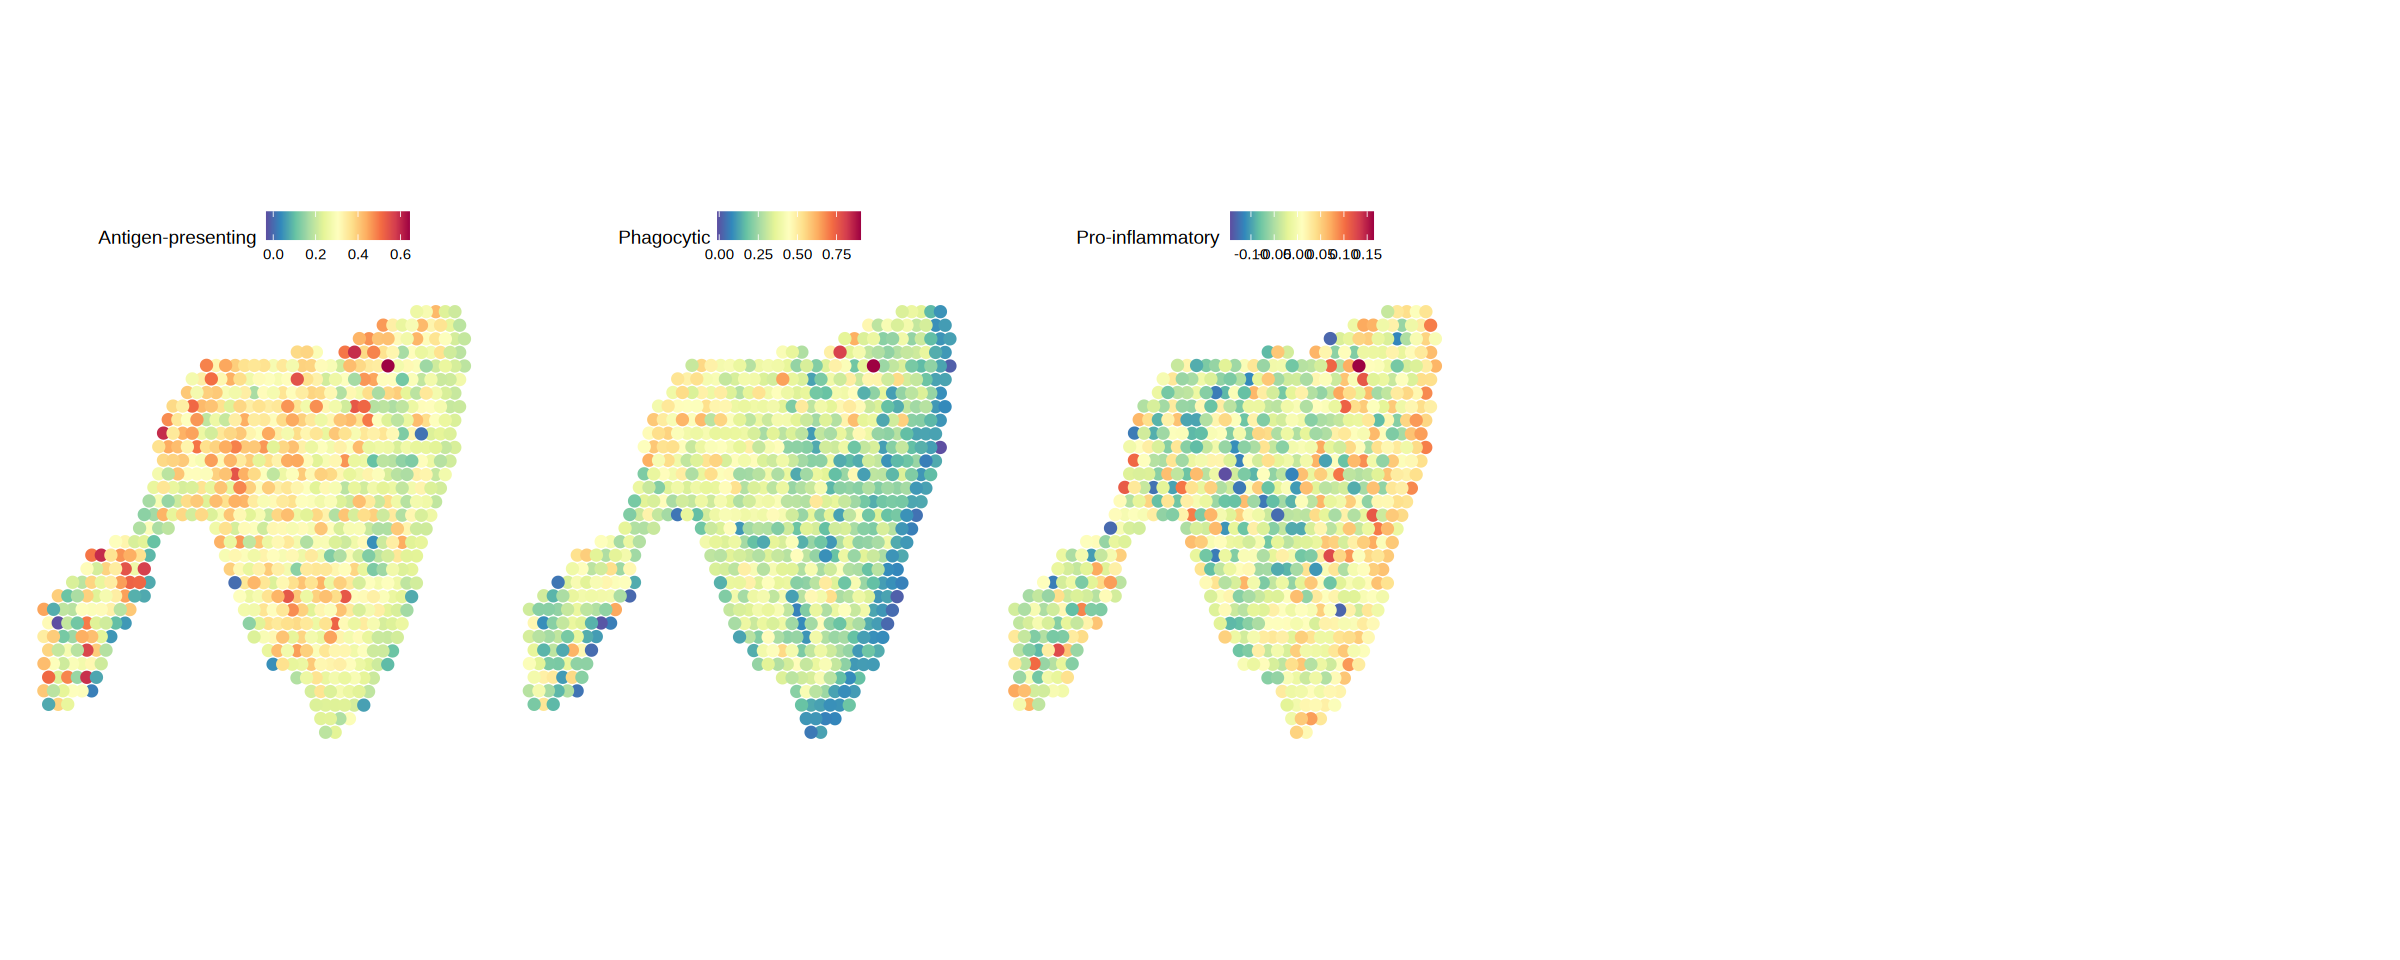

In [17]:
options(repr.plot.height = 8, repr.plot.width = 20)

obj <- readRDS(glue::glue("{out_dir}/SSc-HL33.rds"))

SpatialFeaturePlot(obj, features = celltypes, combine = TRUE, 
                   ncol = 5, image.alpha = 0, pt.size.factor = 9.5)

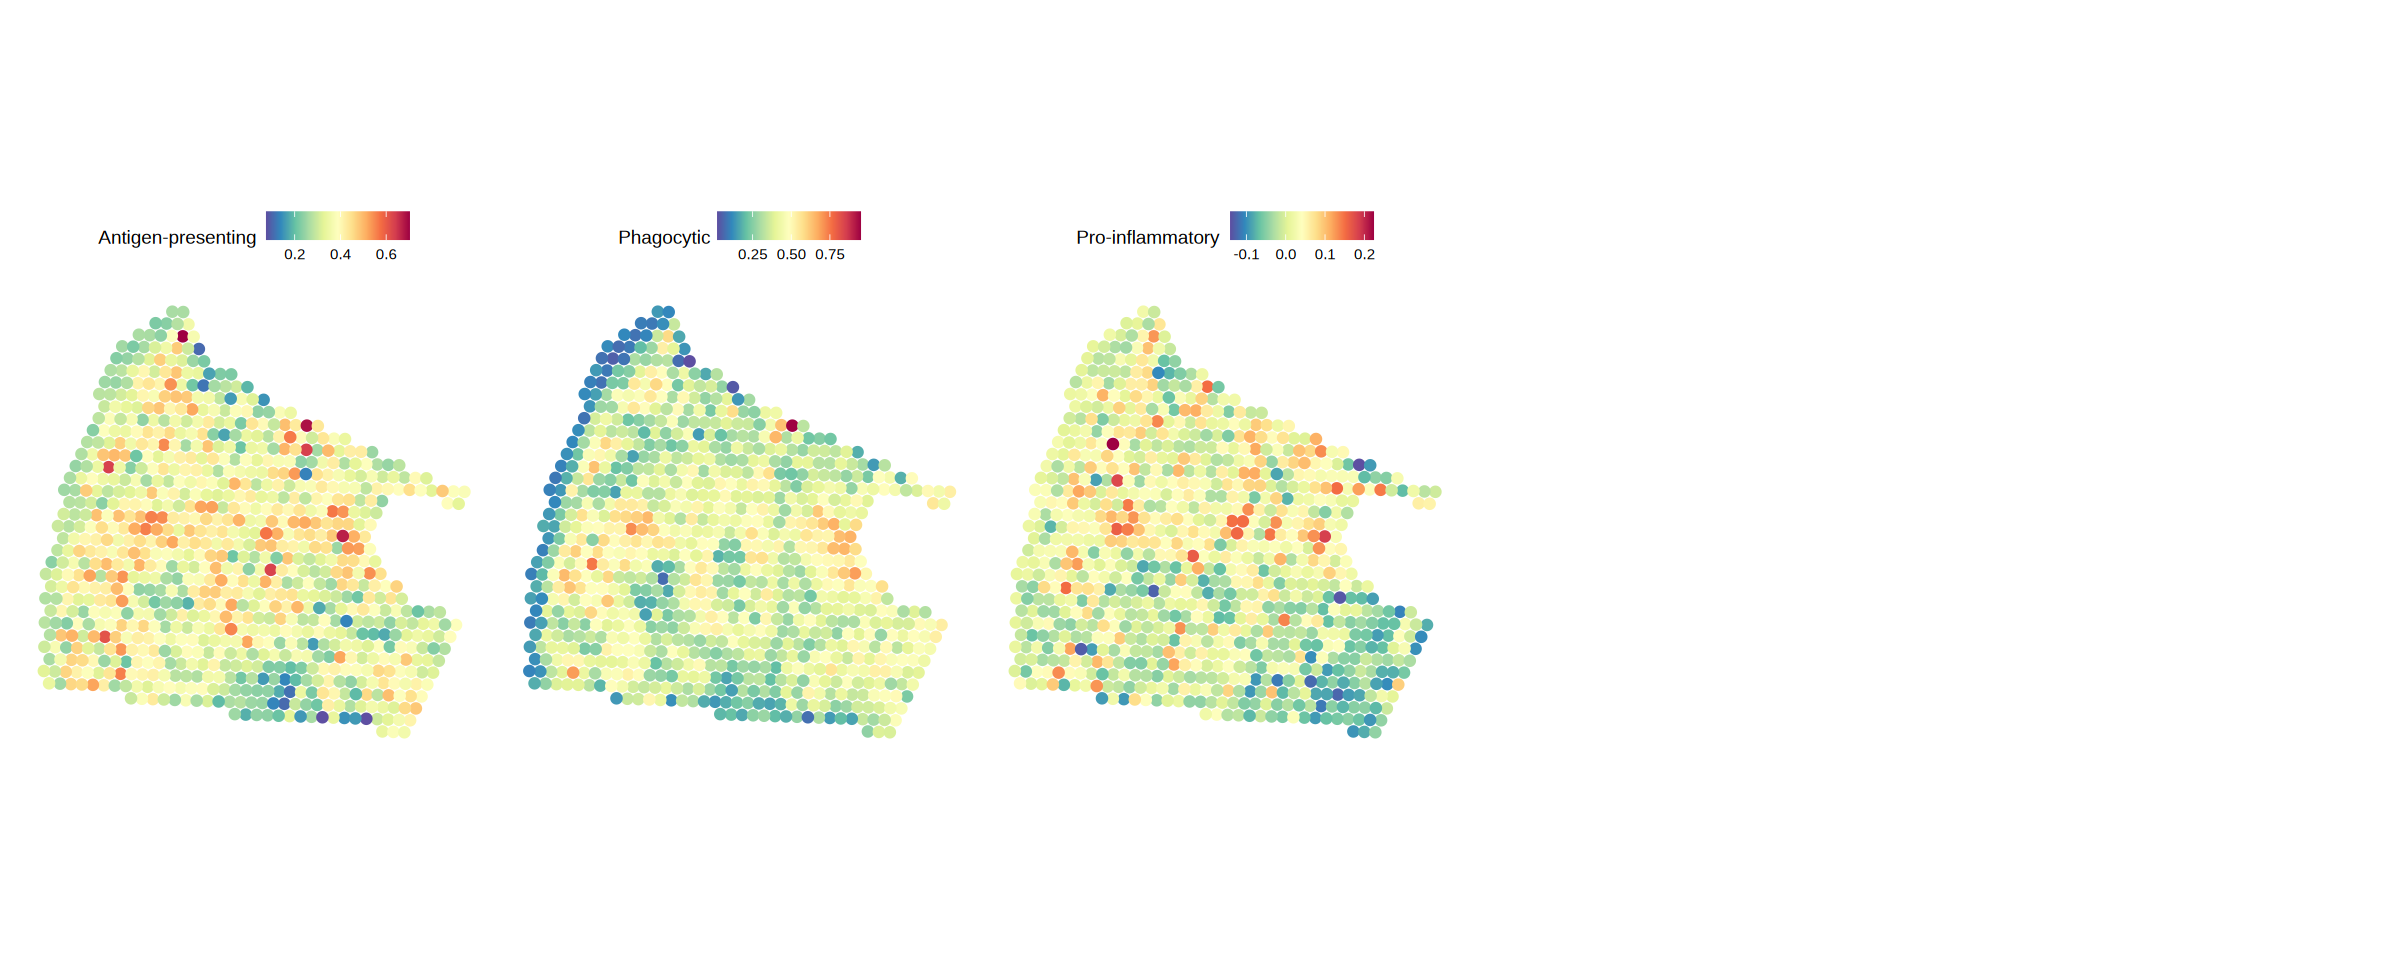

In [18]:
options(repr.plot.height = 8, repr.plot.width = 20)

obj <- readRDS(glue::glue("{out_dir}/SSc-HL35.rds"))

SpatialFeaturePlot(obj, features = celltypes, combine = TRUE, 
                   ncol = 5, image.alpha = 0, pt.size.factor = 10)